In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
data = pd.read_table('expanded.txt', sep='\n', delimiter=',')

In [6]:
data[:10]

,Label,Cap_Shape,Cap_Surface,Cap_Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stalk_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spore_Print_Color,Population,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
5,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
6,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
7,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
8,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
9,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS


In [22]:
X, y = data.drop(labels=['Label'], axis=1), data['Label']

In [94]:
le = preprocessing.LabelEncoder()
Xe, ye = pd.get_dummies(X), le.fit_transform(y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.2, random_state=42)

In [96]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)

In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
feat_imp = pd.DataFrame(data=rf.feature_importances_, index=pd.get_dummies(X).columns.values)
feat_imp.sort_values(by=0)

,0
Stalk_Color_Below_Ring_RED,0.000000
Gill_Attachment_FREE,0.000000
Spore_Print_Color_ORANGE,0.000000
Stalk_Color_Above_Ring_RED,0.000000
Gill_Color_RED,0.000000
Spore_Print_Color_YELLOW,0.000000
Veil_Color_BROWN,0.000000
Veil_Type_PARTIAL,0.000000
Cap_Shape_CONICAL,0.000006
Stalk_Color_Above_Ring_YELLOW,0.000028


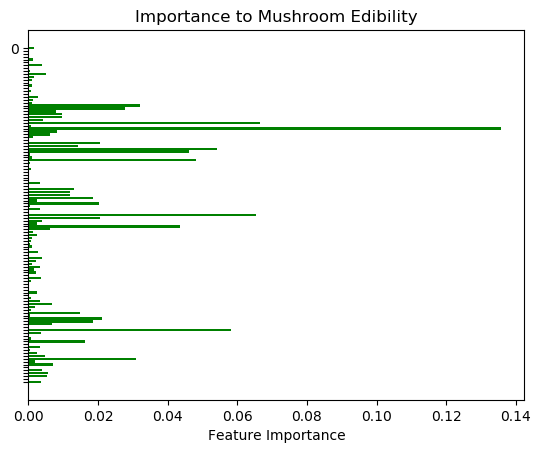

In [99]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(rf.feature_importances_))

ax.barh(y_pos, rf.feature_importances_, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(feat_imp.columns.values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Importance to Mushroom Edibility')

plt.show()

In [103]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test, rf.predict(X_test), target_names=le.inverse_transform([0,1])))

             precision    recall  f1-score   support

     EDIBLE       0.98      1.00      0.99       903
  POISONOUS       1.00      0.98      0.99       781

avg / total       0.99      0.99      0.99      1684



/Users/tbaker/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
